In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import os
print("Current working directory:", os.getcwd())


Current working directory: c:\Users\Rahel\Moonlight-Energy-Optimization\notebooks


In [5]:
df = pd.read_csv(r'C:\Users\Rahel\Moonlight-Energy-Optimization\data\sierraleone-bumbuna.csv')

print(df.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [6]:
# Summary statistics for numerical columns
print(df.describe())


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

In [7]:
# Summary for all columns, including object types
print(df.describe(include='all'))


               Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2022-10-29 23:44            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     201.957515     116.376337     113.720571   
std                  NaN     298.495150     218.652659     158.946032   
min                  NaN     -19.500000      -7.800000     -17.900000   
25%                  NaN      -2.800000      -0.300000      -3.800000   
50%                  NaN       0.300000      -0.100000      -0.100000   
75%                  NaN     362.400000     107.000000     224.700000   
max                  NaN    1499.000000     946.000000     892.000000   

                 ModA           ModB           Tamb             RH  \
count   525600.000000  525600.000000  525600.000000  

In [8]:
# Missing value percentage per column
missing_percent = df.isnull().mean() * 100
print(missing_percent)

Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64


In [9]:
# Combined missing value count and percentage
missing_report = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': df.isnull().mean() * 100
})
print(missing_report)


               Missing Count  Missing %
Timestamp                  0        0.0
GHI                        0        0.0
DNI                        0        0.0
DHI                        0        0.0
ModA                       0        0.0
ModB                       0        0.0
Tamb                       0        0.0
RH                         0        0.0
WS                         0        0.0
WSgust                     0        0.0
WSstdev                    0        0.0
WD                         0        0.0
WDstdev                    0        0.0
BP                         0        0.0
Cleaning                   0        0.0
Precipitation              0        0.0
TModA                      0        0.0
TModB                      0        0.0
Comments              525600      100.0


In [10]:
# Loop through numerical columns and identify outliers using IQR
numerical_cols = df.select_dtypes(include=['number']).columns

outliers = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers[col] = len(outlier_rows)

# Show number of outliers per column
print("Outlier count per numerical column:")
print(outliers)


Outlier count per numerical column:
{'GHI': 15853, 'DNI': 101688, 'DHI': 4407, 'ModA': 21017, 'ModB': 20613, 'Tamb': 652, 'RH': 11865, 'WS': 3169, 'WSgust': 3665, 'WSstdev': 812, 'WD': 0, 'WDstdev': 4918, 'BP': 17264, 'Cleaning': 508, 'Precipitation': 12069, 'TModA': 772, 'TModB': 9, 'Comments': 0}


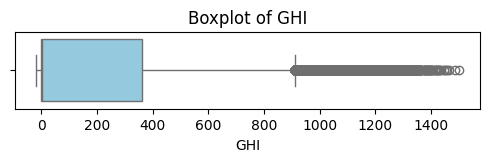

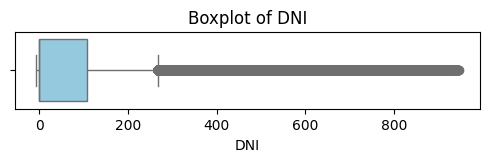

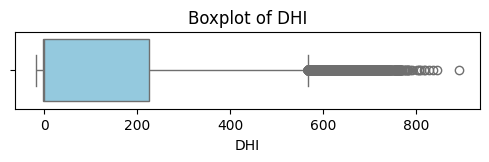

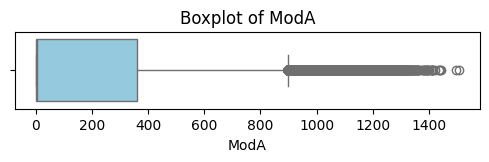

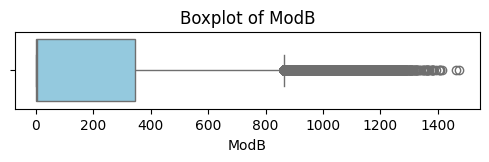

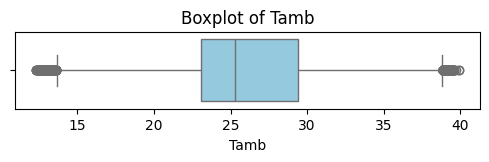

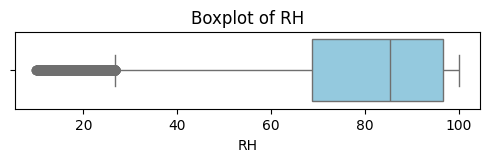

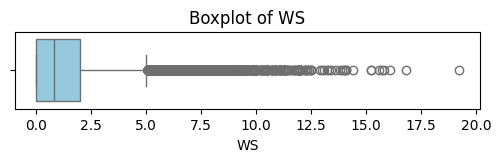

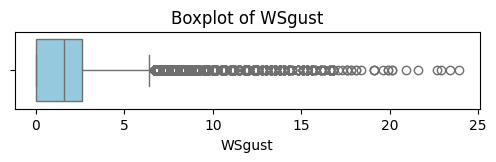

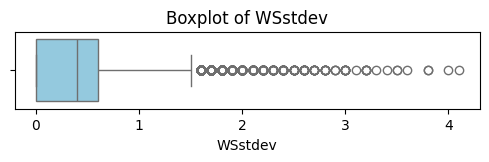

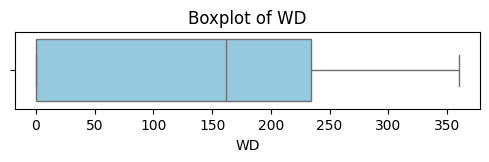

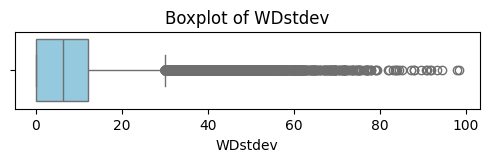

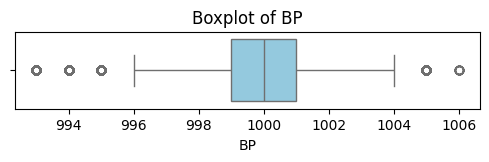

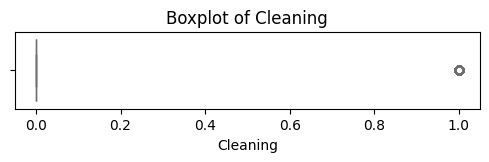

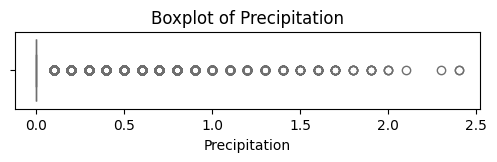

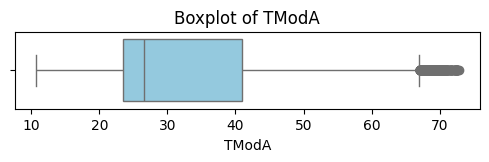

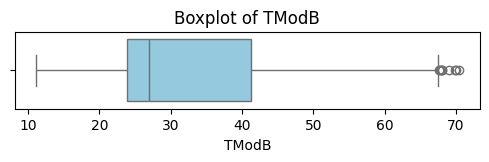

ValueError: List of boxplot statistics and `positions` values must have same the length

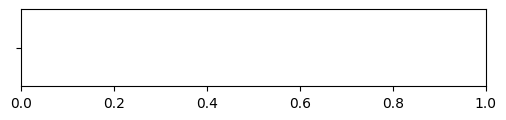

In [11]:
# Boxplots for all numerical features
for col in numerical_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.show()